In [1]:
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
import os

# Define the power curve
power_curve = [(1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 250.0), (5.0, 613.0), (6.0, 1226.0), (7.0, 2030.0), (8.0, 3123.0), (9.0, 4444.0), (10.0, 5900.0), (11.0, 7300.0), (12.0, 8600.0), (13.0, 9272.0), (14.0, 9500.0), (15.0, 9500.0), (16.0, 9500.0), (17.0, 9500.0), (18.0, 9500.0), (19.0, 9500.0), (20.0, 9500.0), (21.0, 9500.0), (22.0, 9500.0), (23.0, 9500.0), (24.0, 9500.0), (25.0, 9500.0)]
speed, power = np.array([pc[0] for pc in power_curve]), np.array([pc[1] for pc in power_curve])

# Create an interpolation function based on the power curve
f = interp1d(speed, power, kind='cubic', fill_value="extrapolate")

# Function to calculate power output from wind speed using the power curve
def calculate_power_output(wind_speed):
    # Ensure wind speed is within the curve's limits
    if wind_speed > max(speed):
        return 0.0
    elif wind_speed < min(speed):
        return 0.0
    else:
        return f(wind_speed)

# Define the input and output directories
input_dir = r'C:\Users\gille\OneDrive\Documents\Travail\HEC-University\Master_2\Master Thesis\Code\wind_data\MAR_24\csv'
output_dir = os.path.join(input_dir, 'load_factor')
os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists

def calculate_power_output(wind_speed):
    try:
        # Convert wind_speed to float to ensure numeric operations can be performed
        wind_speed = float(wind_speed)
    except ValueError:
        # If conversion fails, return 0.0 as the power output
        return 0.0
    
    # Proceed with checking against the power curve's limits
    if wind_speed > max(speed):
        return 0.0
    elif wind_speed < min(speed):
        return 0.0
    else:
        return f(wind_speed)

# When processing each CSV file:
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_dir, filename)
        df = pd.read_csv(file_path)

        # Ensure '100m' column is treated as numeric. Attempt to convert non-numeric to NaN, then fill with 0
        df['100m'] = pd.to_numeric(df['100m'], errors='coerce').fillna(0)

        # Calculate power output for the wind speed at 100m, then normalize to get the load factor
        df['load_factor'] = df['100m'].apply(calculate_power_output) / 9500.0
        df['load_factor'] = np.clip(df['load_factor'], 0, 1)  # Ensure load factor is between 0 and 1

        # Prepare the DataFrame for output
        output_df = df[['YYY', 'MM', 'DD', 'HH', 'NAME', 'stLON', 'stLAT', 'MARlon', 'MARlat', '100m', 'load_factor']]

        # Construct the output file path and write to CSV
        output_file_path = os.path.join(output_dir, os.path.splitext(filename)[0] + '_lf.csv')
        output_df.to_csv(output_file_path, index=False)

print("All files processed. Load factor CSV files are saved in the 'load_factor' directory.")

All files processed. Load factor CSV files are saved in the 'load_factor' directory.


In [2]:
import pandas as pd
import os

# Define the directory where the load factor files are stored
load_factor_dir = r'C:\Users\gille\OneDrive\Documents\Travail\HEC-University\Master_2\Master Thesis\Code\wind_data\MAR_24\csv\load_factor'

# Initialize a dictionary to store the average load factor for each location
average_load_factors = {}

# Loop over each load factor CSV file in the directory
for filename in os.listdir(load_factor_dir):
    if filename.endswith('_lf.csv'):
        # Extract the location name from the filename (assuming the format is 'locationname_lf.csv')
        location_name = filename.replace('_lf.csv', '')
        
        # Construct the full path to the file
        file_path = os.path.join(load_factor_dir, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Calculate the average load factor for this location
        average_load_factor = df['load_factor'].mean()
        
        # Store the average load factor in the dictionary
        average_load_factors[location_name] = average_load_factor

# Convert the dictionary to a DataFrame for easier sorting and manipulation
locations_df = pd.DataFrame(list(average_load_factors.items()), columns=['Location', 'Average Load Factor'])

# Sort the DataFrame by 'Average Load Factor' in descending order to rank the locations
ranked_locations = locations_df.sort_values(by='Average Load Factor', ascending=False).reset_index(drop=True)

# Print the ranked locations
print(ranked_locations)

     Location  Average Load Factor
0   offshore3             0.577632
1  AWS_0680_2             0.533469
2   offshore2             0.472009
3    AWS_6640             0.455418
4    AWS_0460             0.340911
5  AWS_0680_1             0.329938
6   offshore1             0.282855


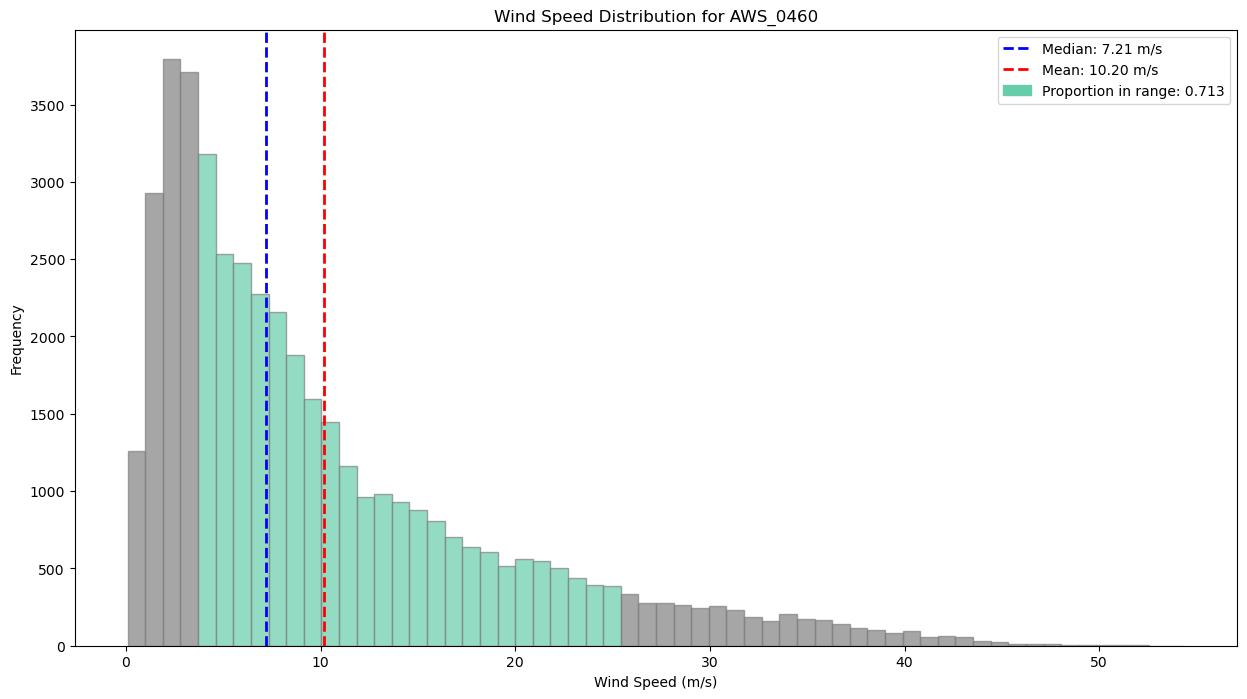

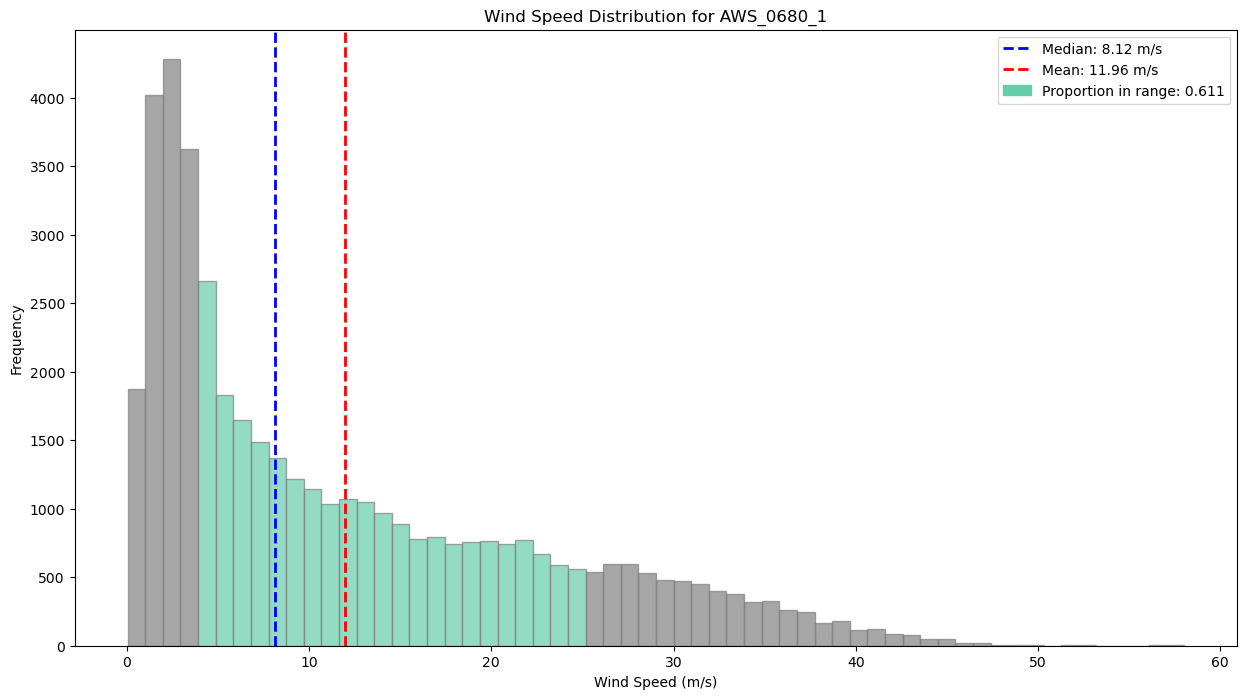

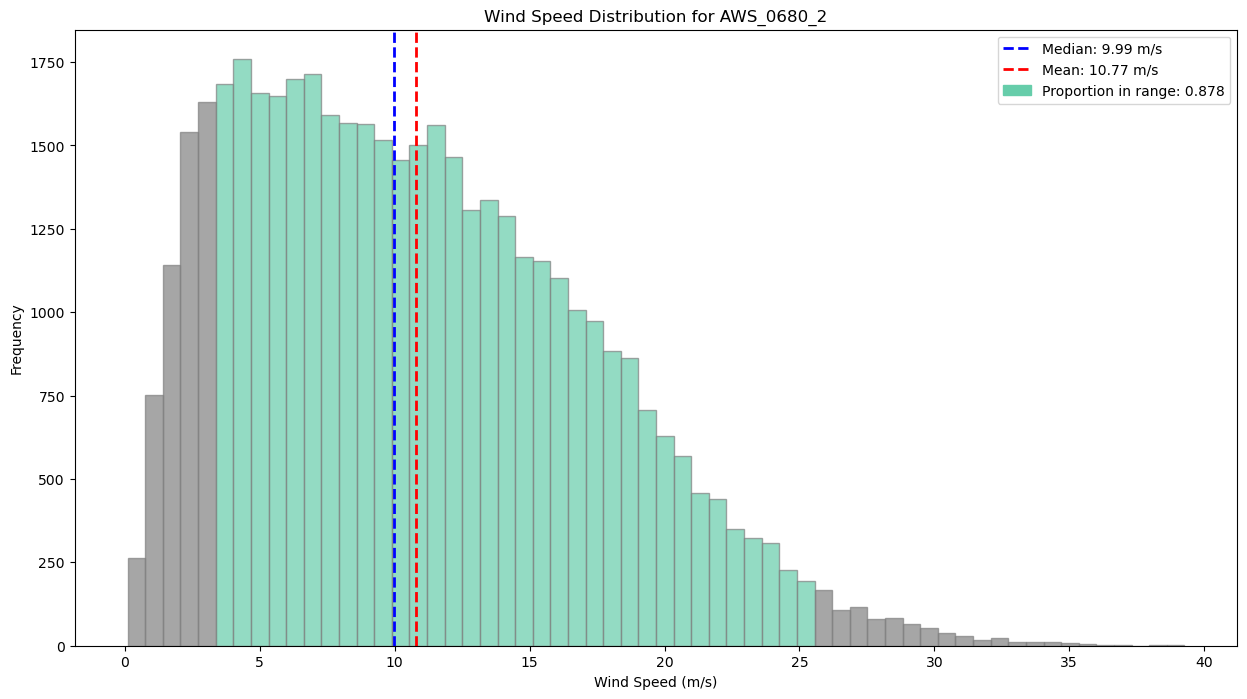

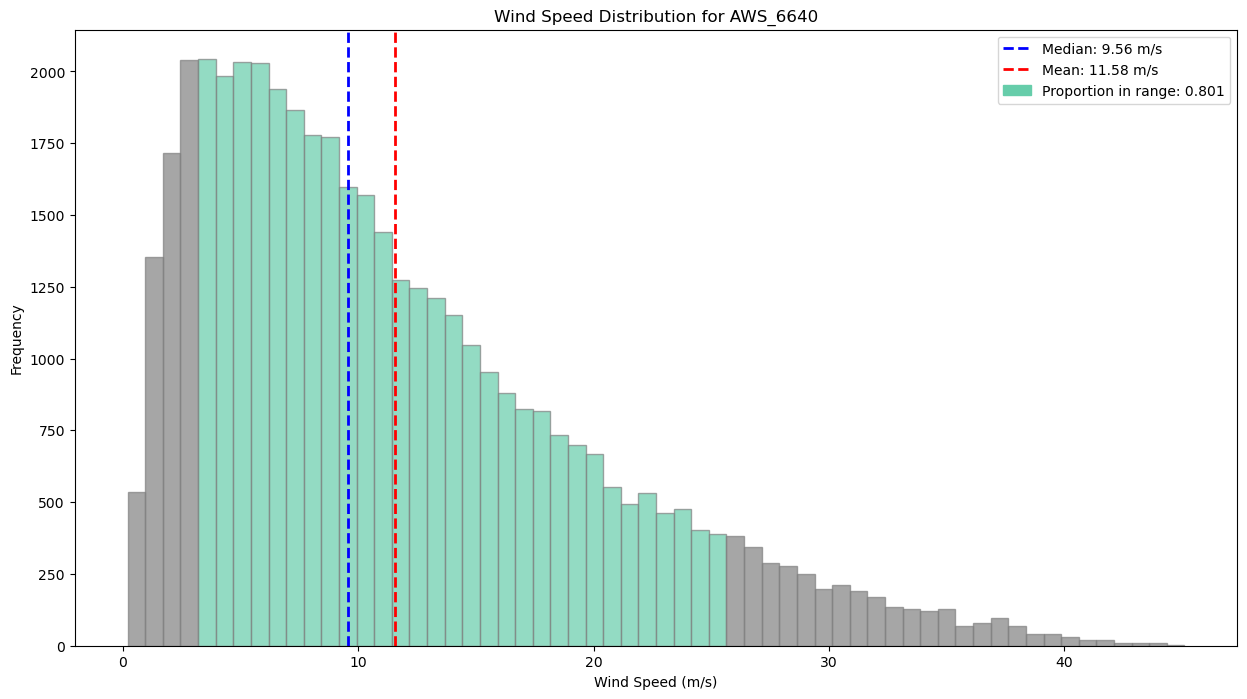

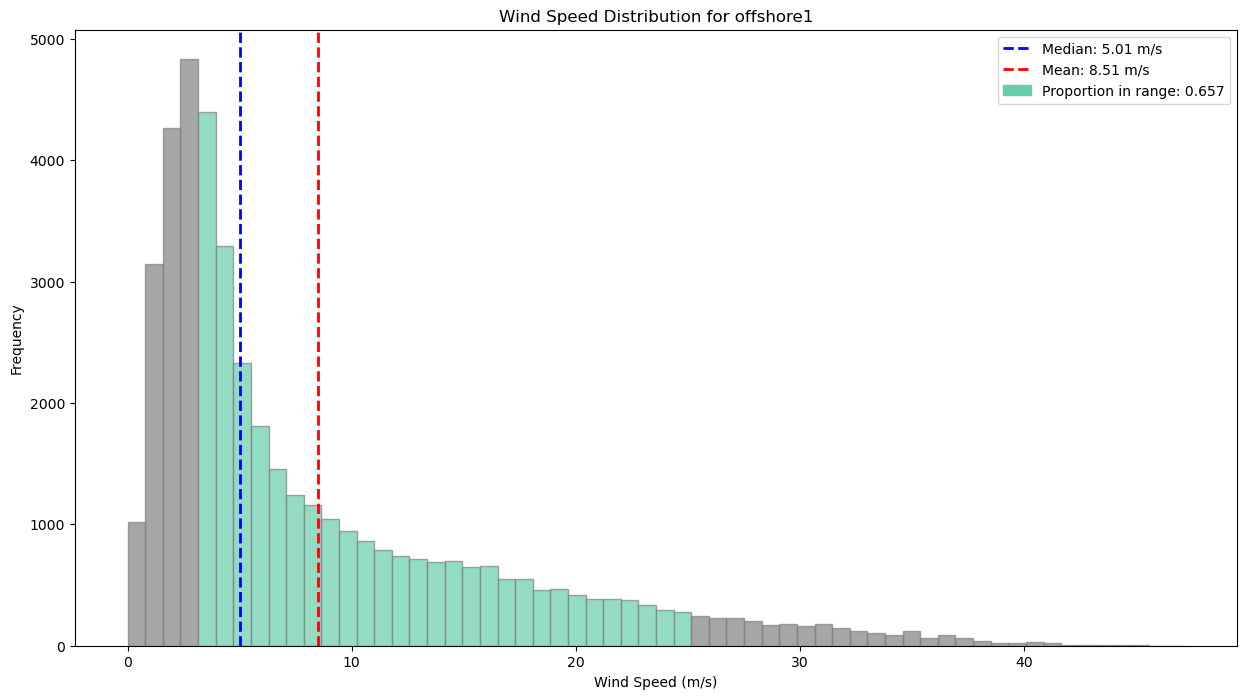

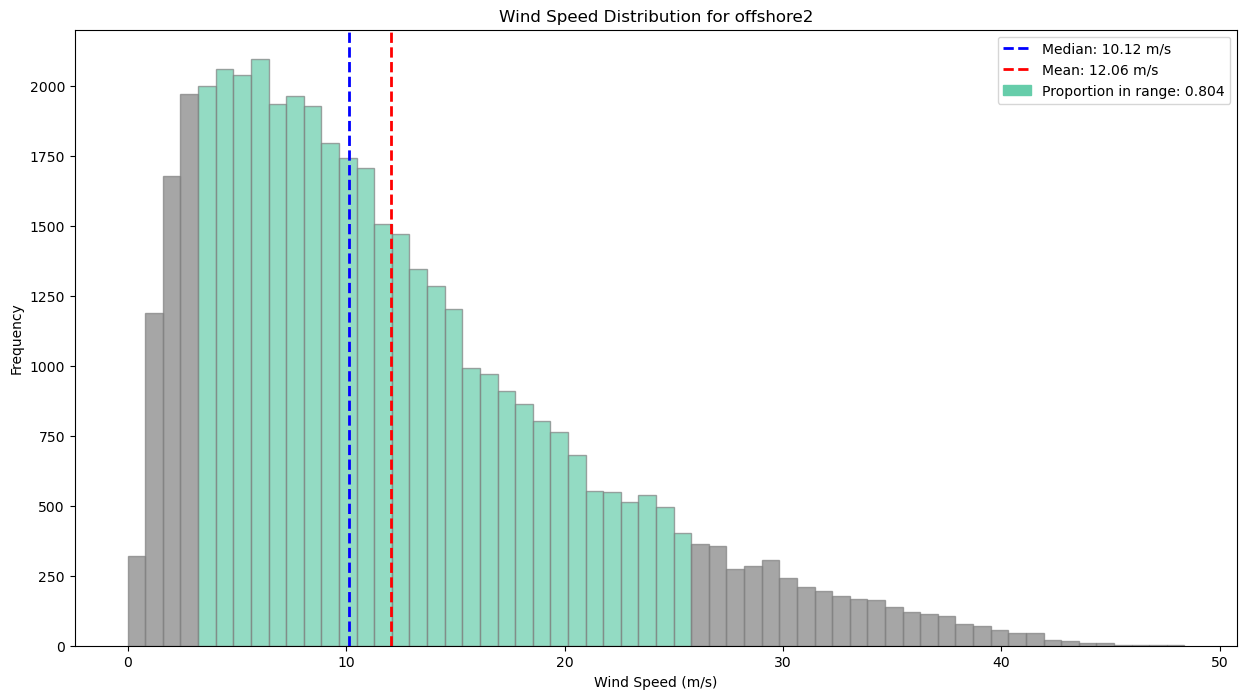

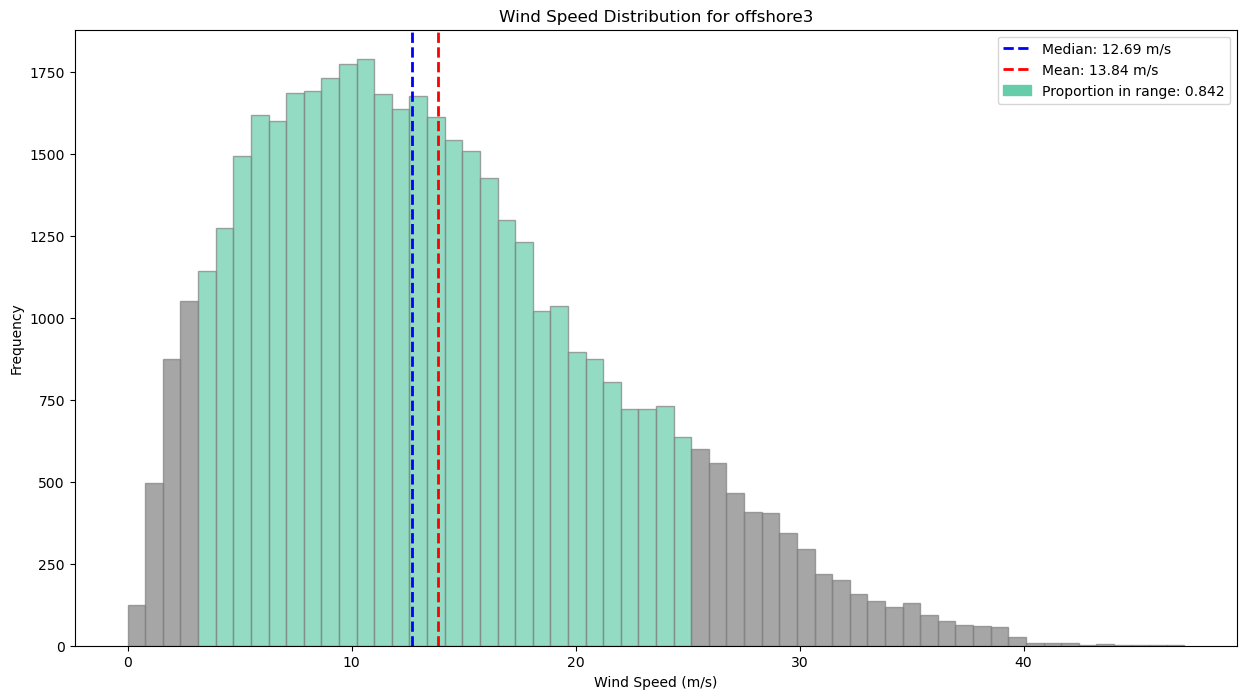

In [4]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

# Define the directory where the CSV files are stored
input_dir = r'C:\Users\gille\OneDrive\Documents\Travail\HEC-University\Master_2\Master Thesis\Code\wind_data\MAR_24\csv\load_factor'

# Define the function to plot the data with the given specifications
# Let's define a function to plot the data with the given specifications
def plot_windspeed_distribution(data, title, color_thresholds=(3, 25)):
    """
    This function plots the windspeed distribution with the specified title and color thresholds.
    It also calculates and returns the proportion of data within the color thresholds.
    """
    # Calculate the median and mean
    median_windspeed = np.median(data)
    mean_windspeed = np.mean(data)
    
    # Compute the proportion of hours in the interval of color_thresholds
    hours_in_range = ((data >= color_thresholds[0]) & (data <= color_thresholds[1])).sum()
    proportion_in_range = hours_in_range / len(data)

    # Plotting the windspeeds by frequency
    plt.figure(figsize=(15, 8))
    counts, bins, patches = plt.hist(data, bins=60, color='mediumaquamarine', alpha=0.7, edgecolor='grey')

    # Color the bars outside the color_thresholds range in grey
    for bin, patch in zip(bins, patches):
        if bin < color_thresholds[0] or bin > color_thresholds[1]:
            patch.set_color('grey')

    # Add lines for median and mean
    plt.axvline(median_windspeed, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_windspeed:.2f} m/s')
    plt.axvline(mean_windspeed, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_windspeed:.2f} m/s')

    # Adding labels and title
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Frequency')
    plt.title(title)
   
    # Create a custom legend entry for the proportion
    import matplotlib.patches as mpatches
    proportion_patch = mpatches.Patch(color='mediumaquamarine', label=f'Proportion in range: {proportion_in_range:.3f}')
    
    # Get the current legend
    handles, labels = plt.gca().get_legend_handles_labels()

    # Add the custom legend entry
    handles.append(proportion_patch)

    # Add the proportion to the legend
    plt.legend(handles=handles)
    
    # Show the plot
    plt.show()

    return proportion_in_range

# List all the CSV files in the input directory
csv_files = [file for file in os.listdir(input_dir) if file.endswith('.csv')]

# Loop over each CSV file and plot the wind speed distribution
for csv_file in csv_files:
    # Read wind speed data from the '100m' column of the CSV file
    df = pd.read_csv(os.path.join(input_dir, csv_file))
    wind_speed_data = df['100m'].values

    # Extract location name from the filename by stripping '_lf.csv'
    location_name = csv_file.replace('_lf.csv', '')

    # Create the title for the plot
    title = f'Wind Speed Distribution for {location_name}'

    # Plot the distribution
    plot_windspeed_distribution(wind_speed_data, title)

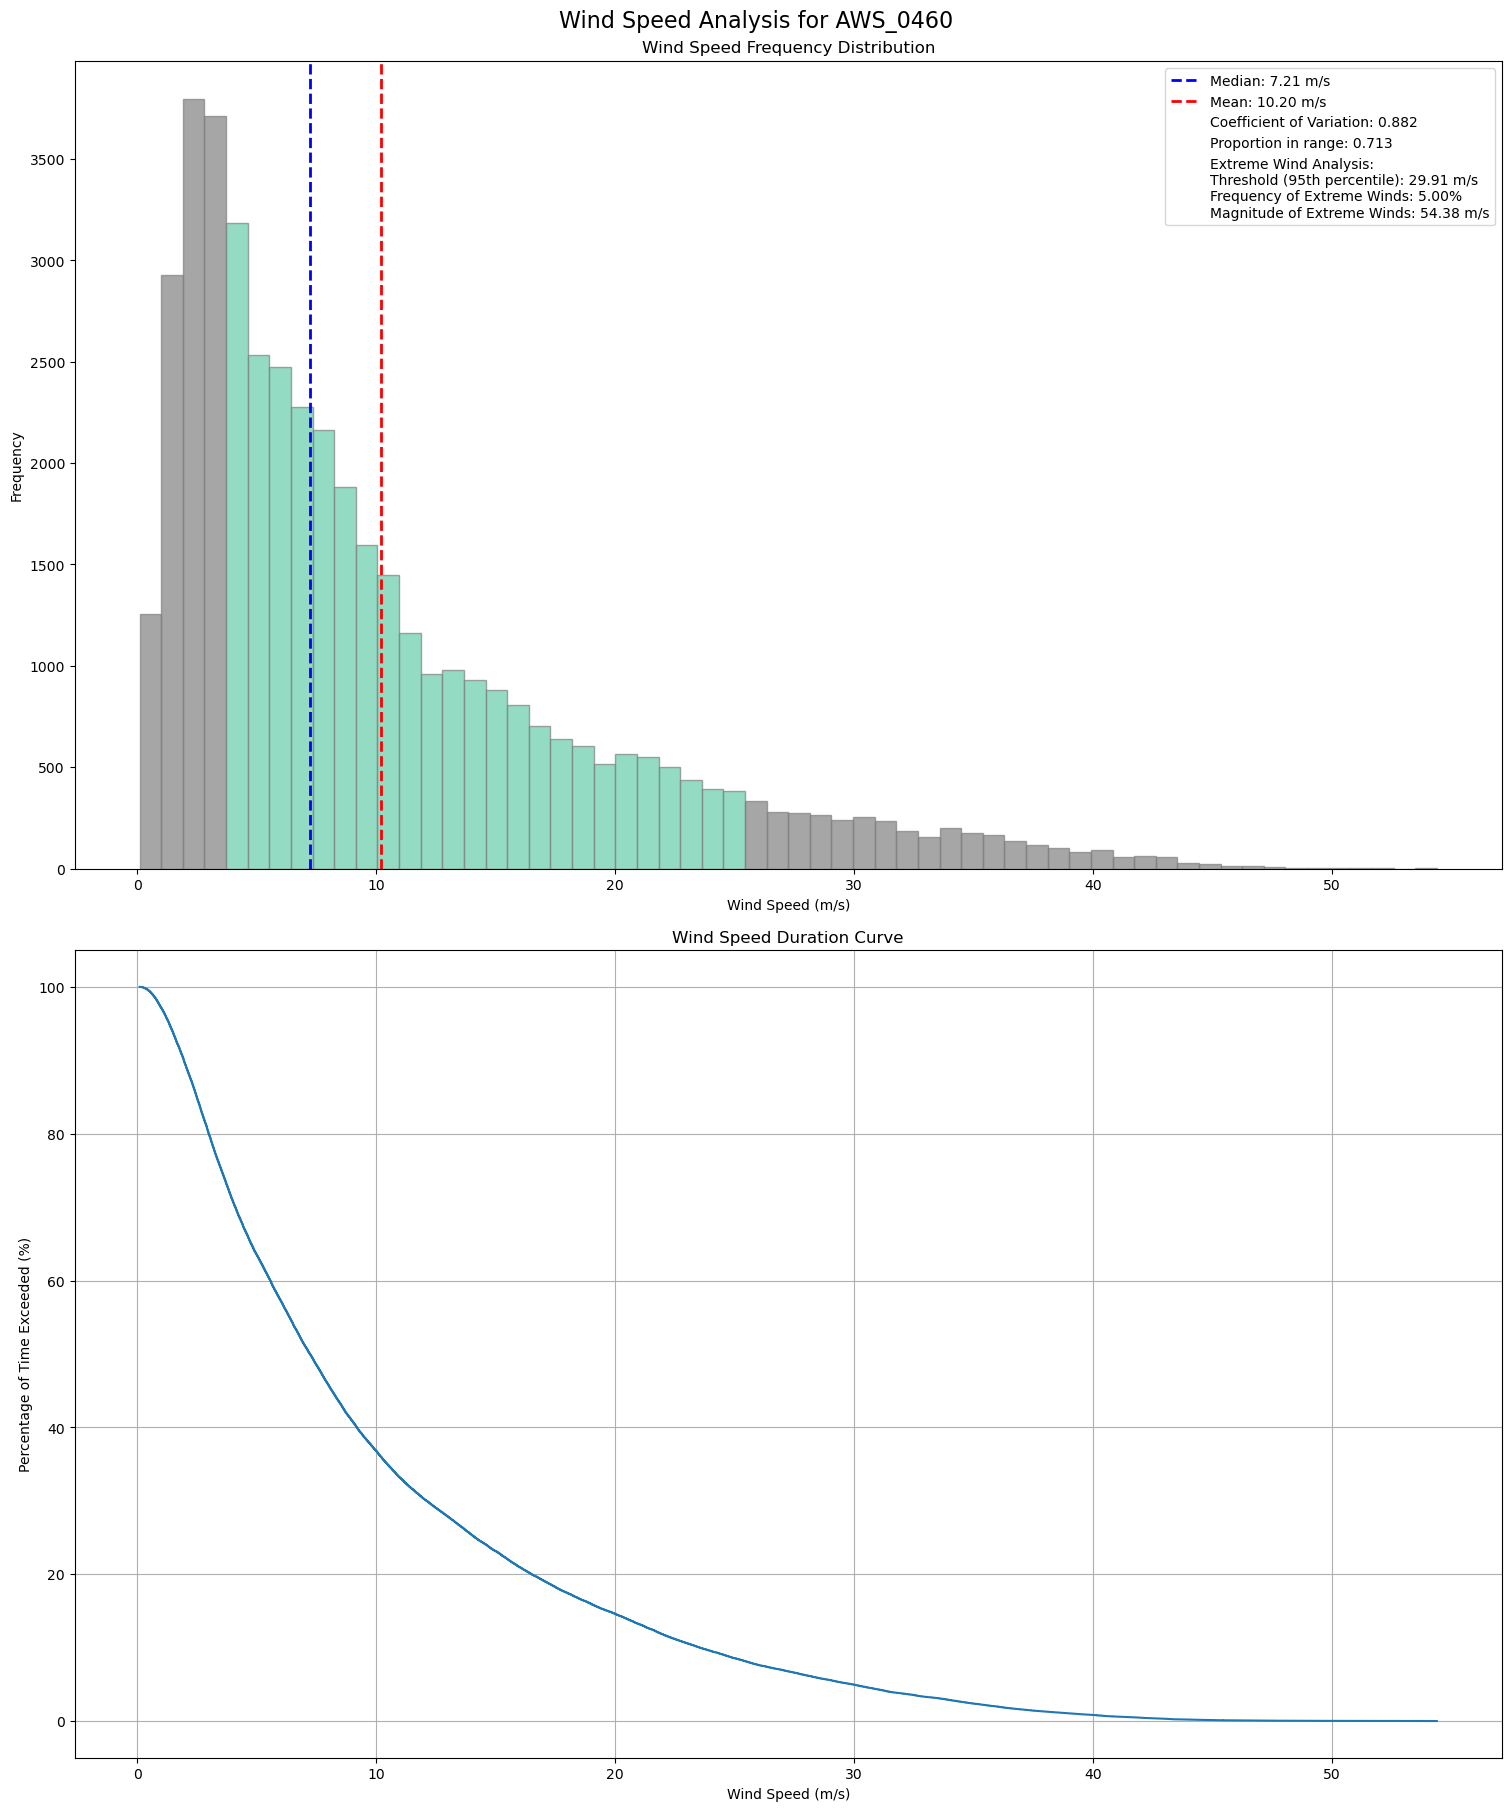

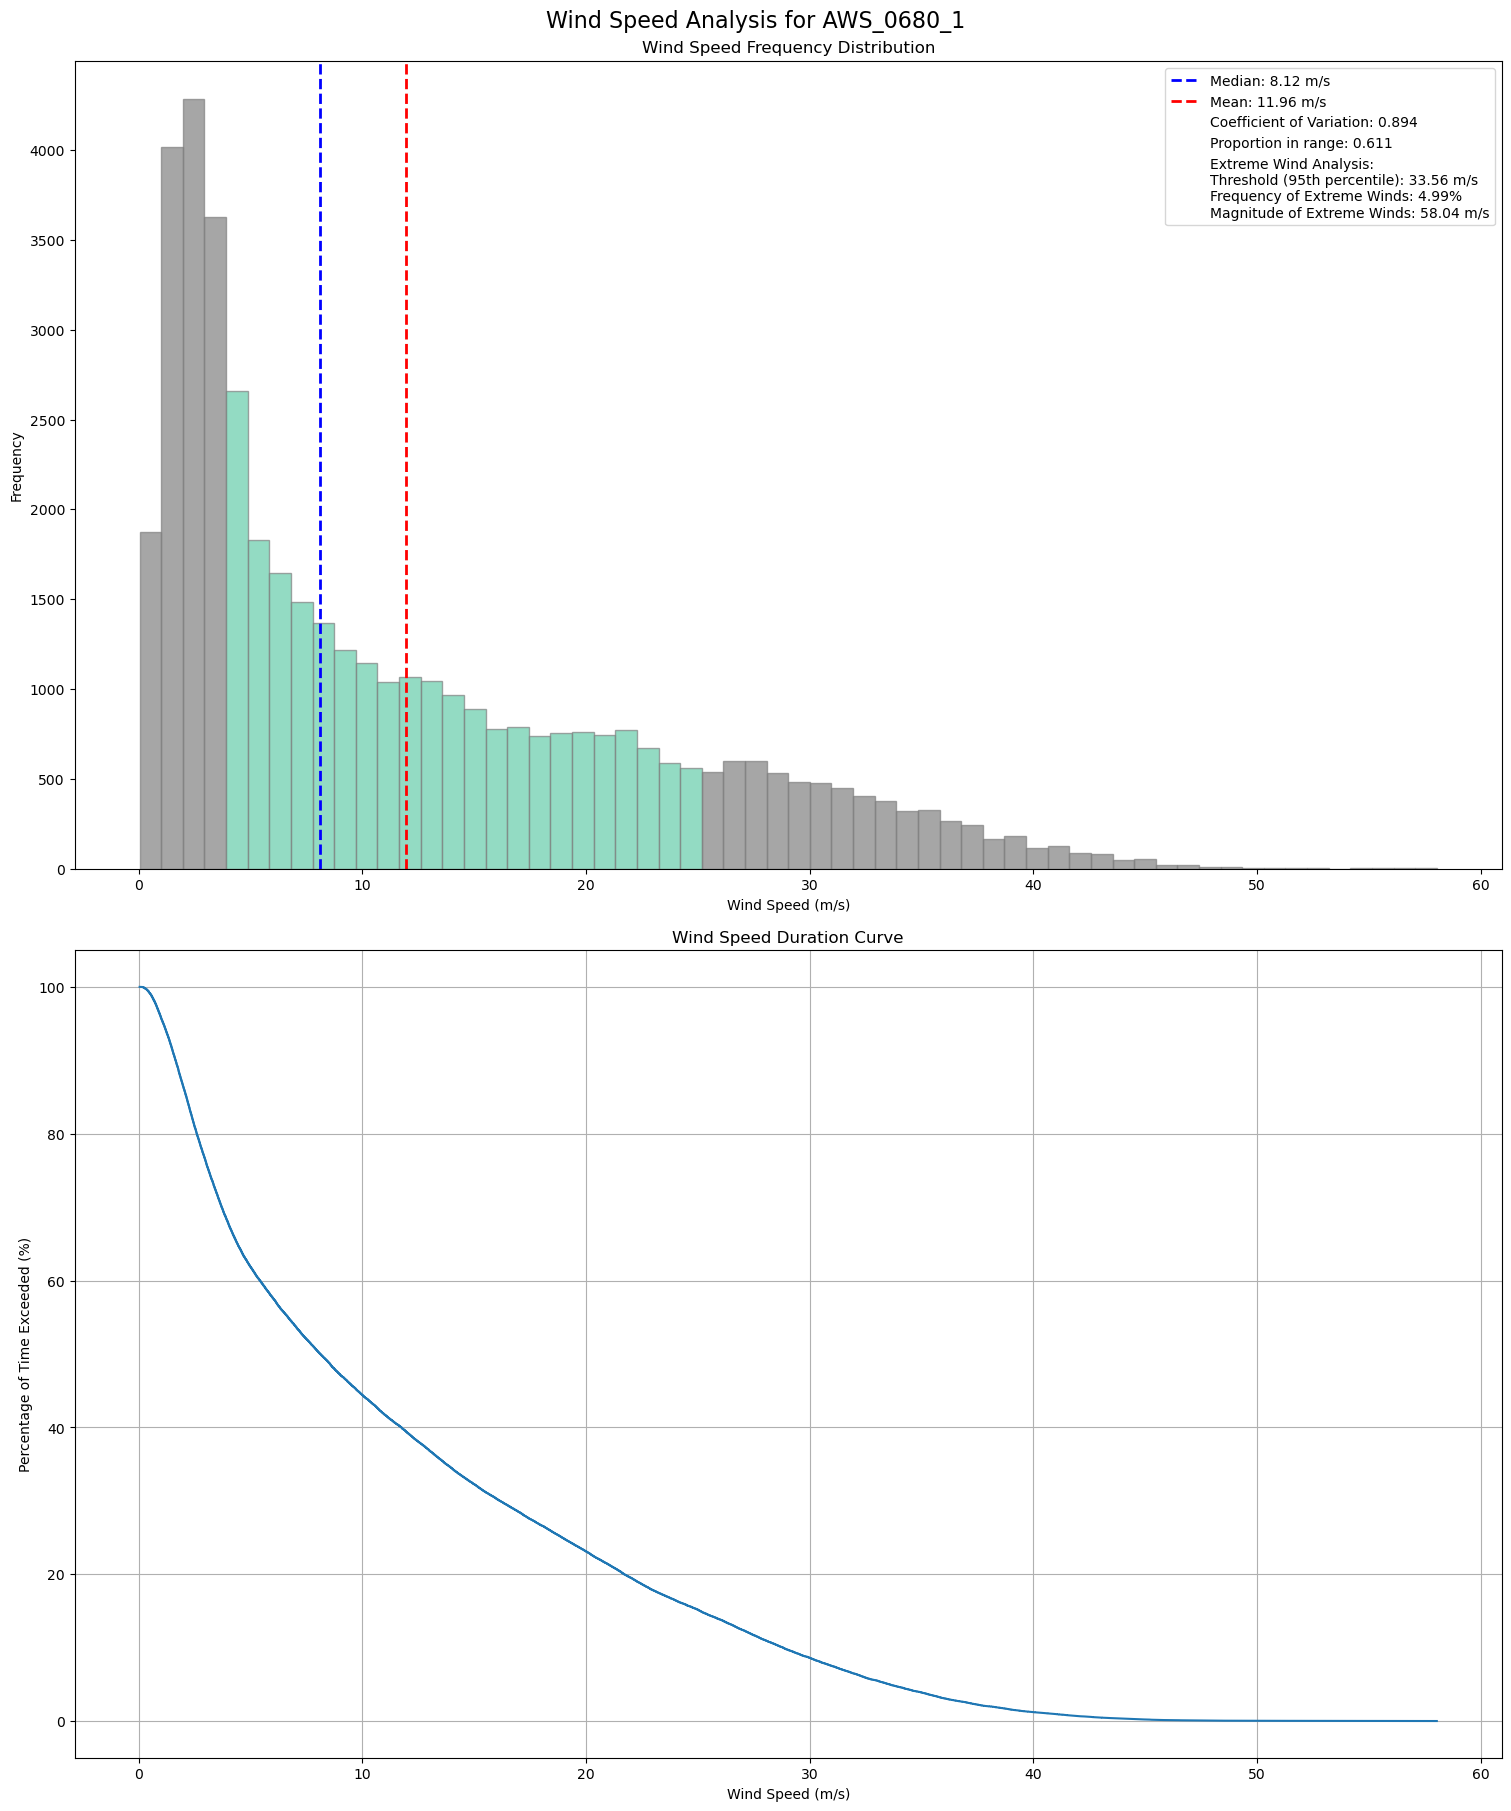

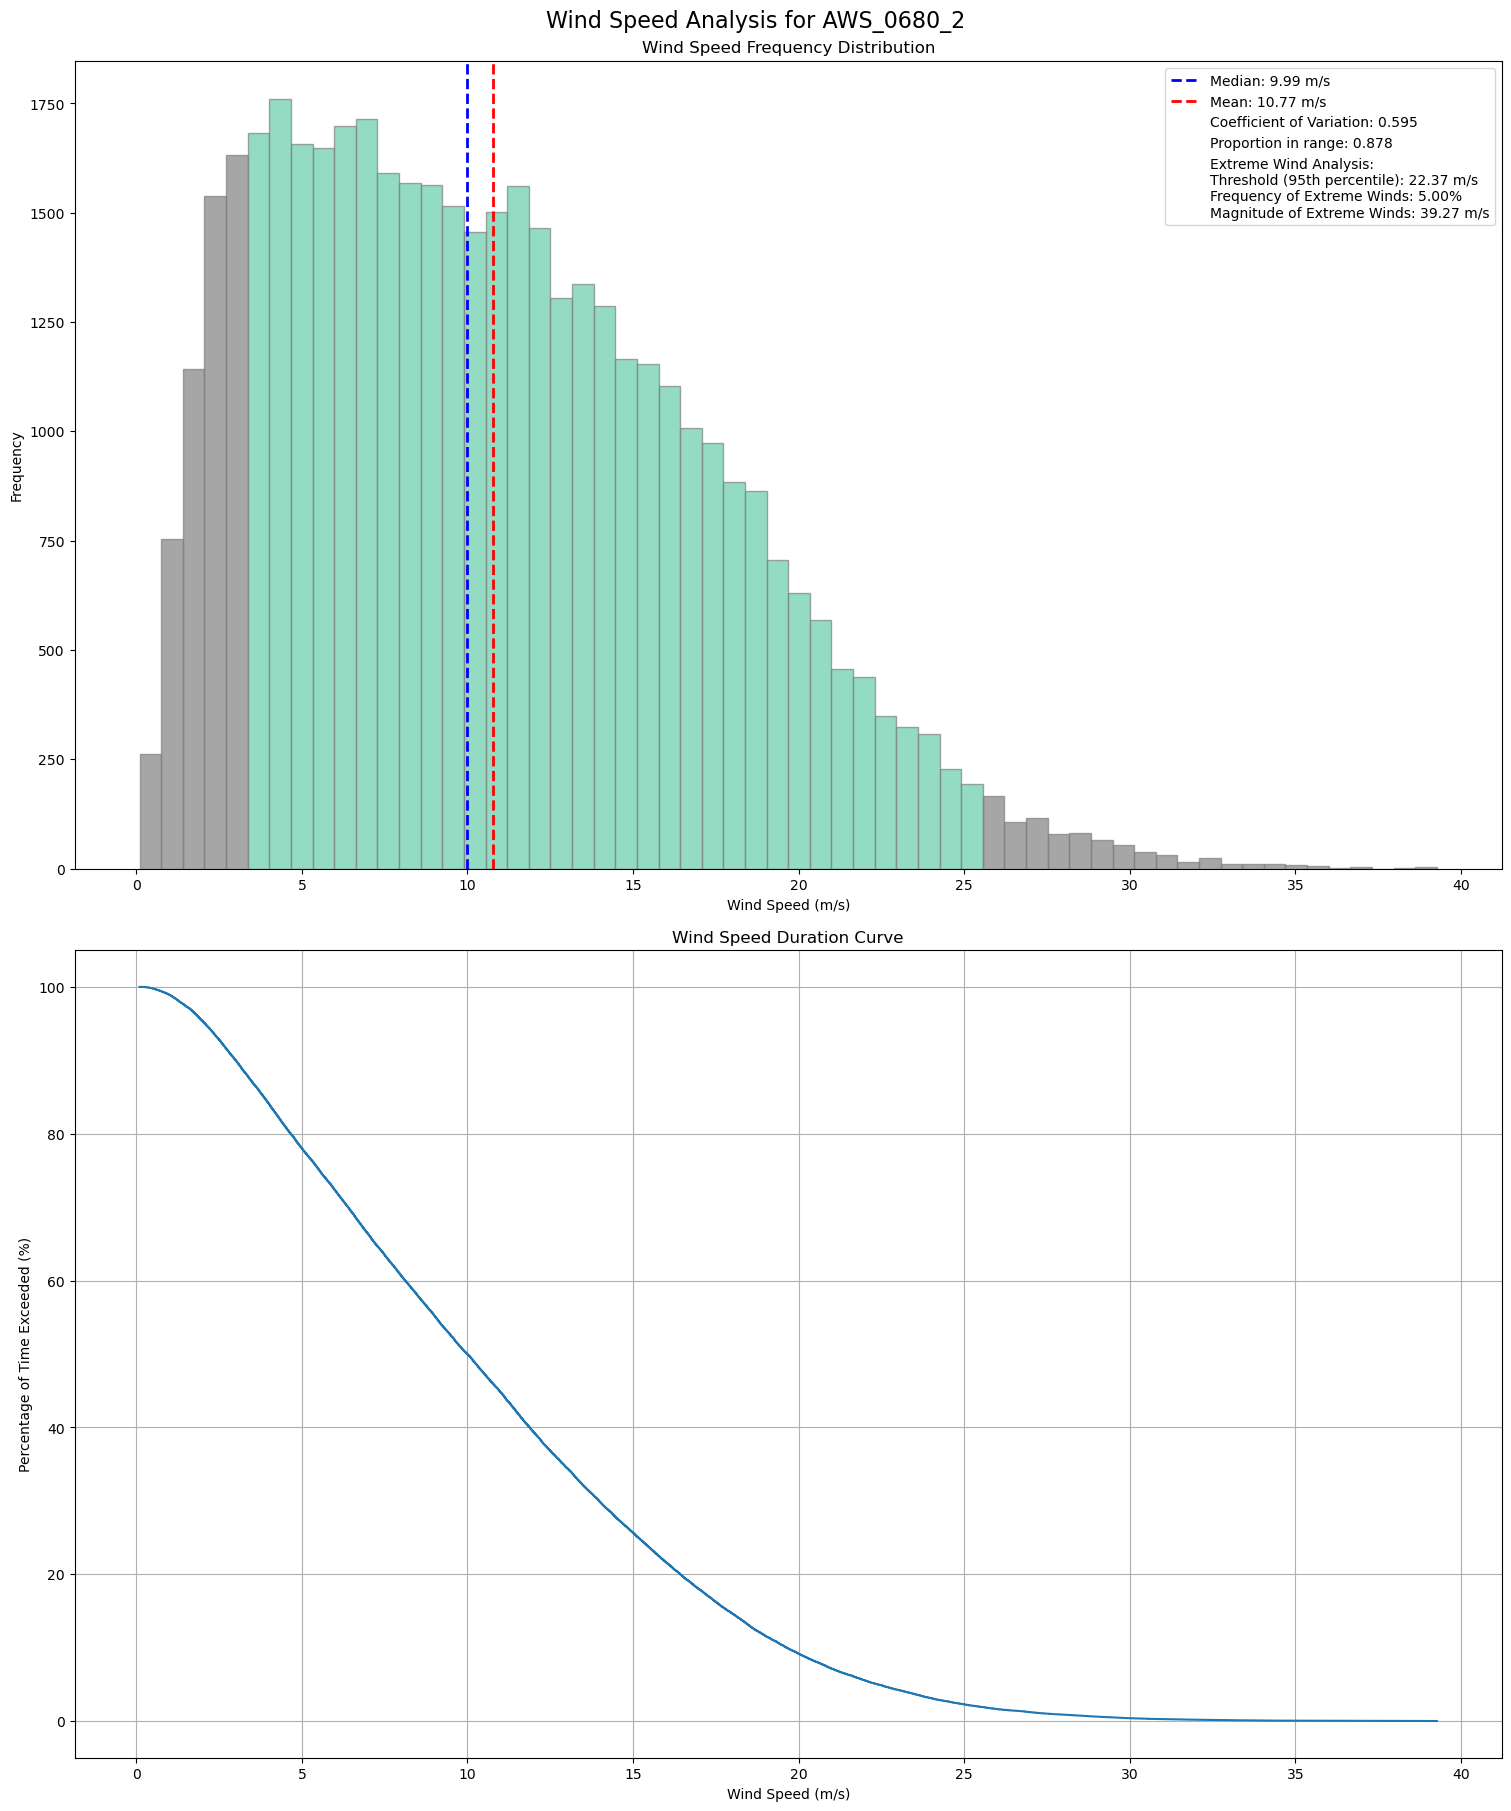

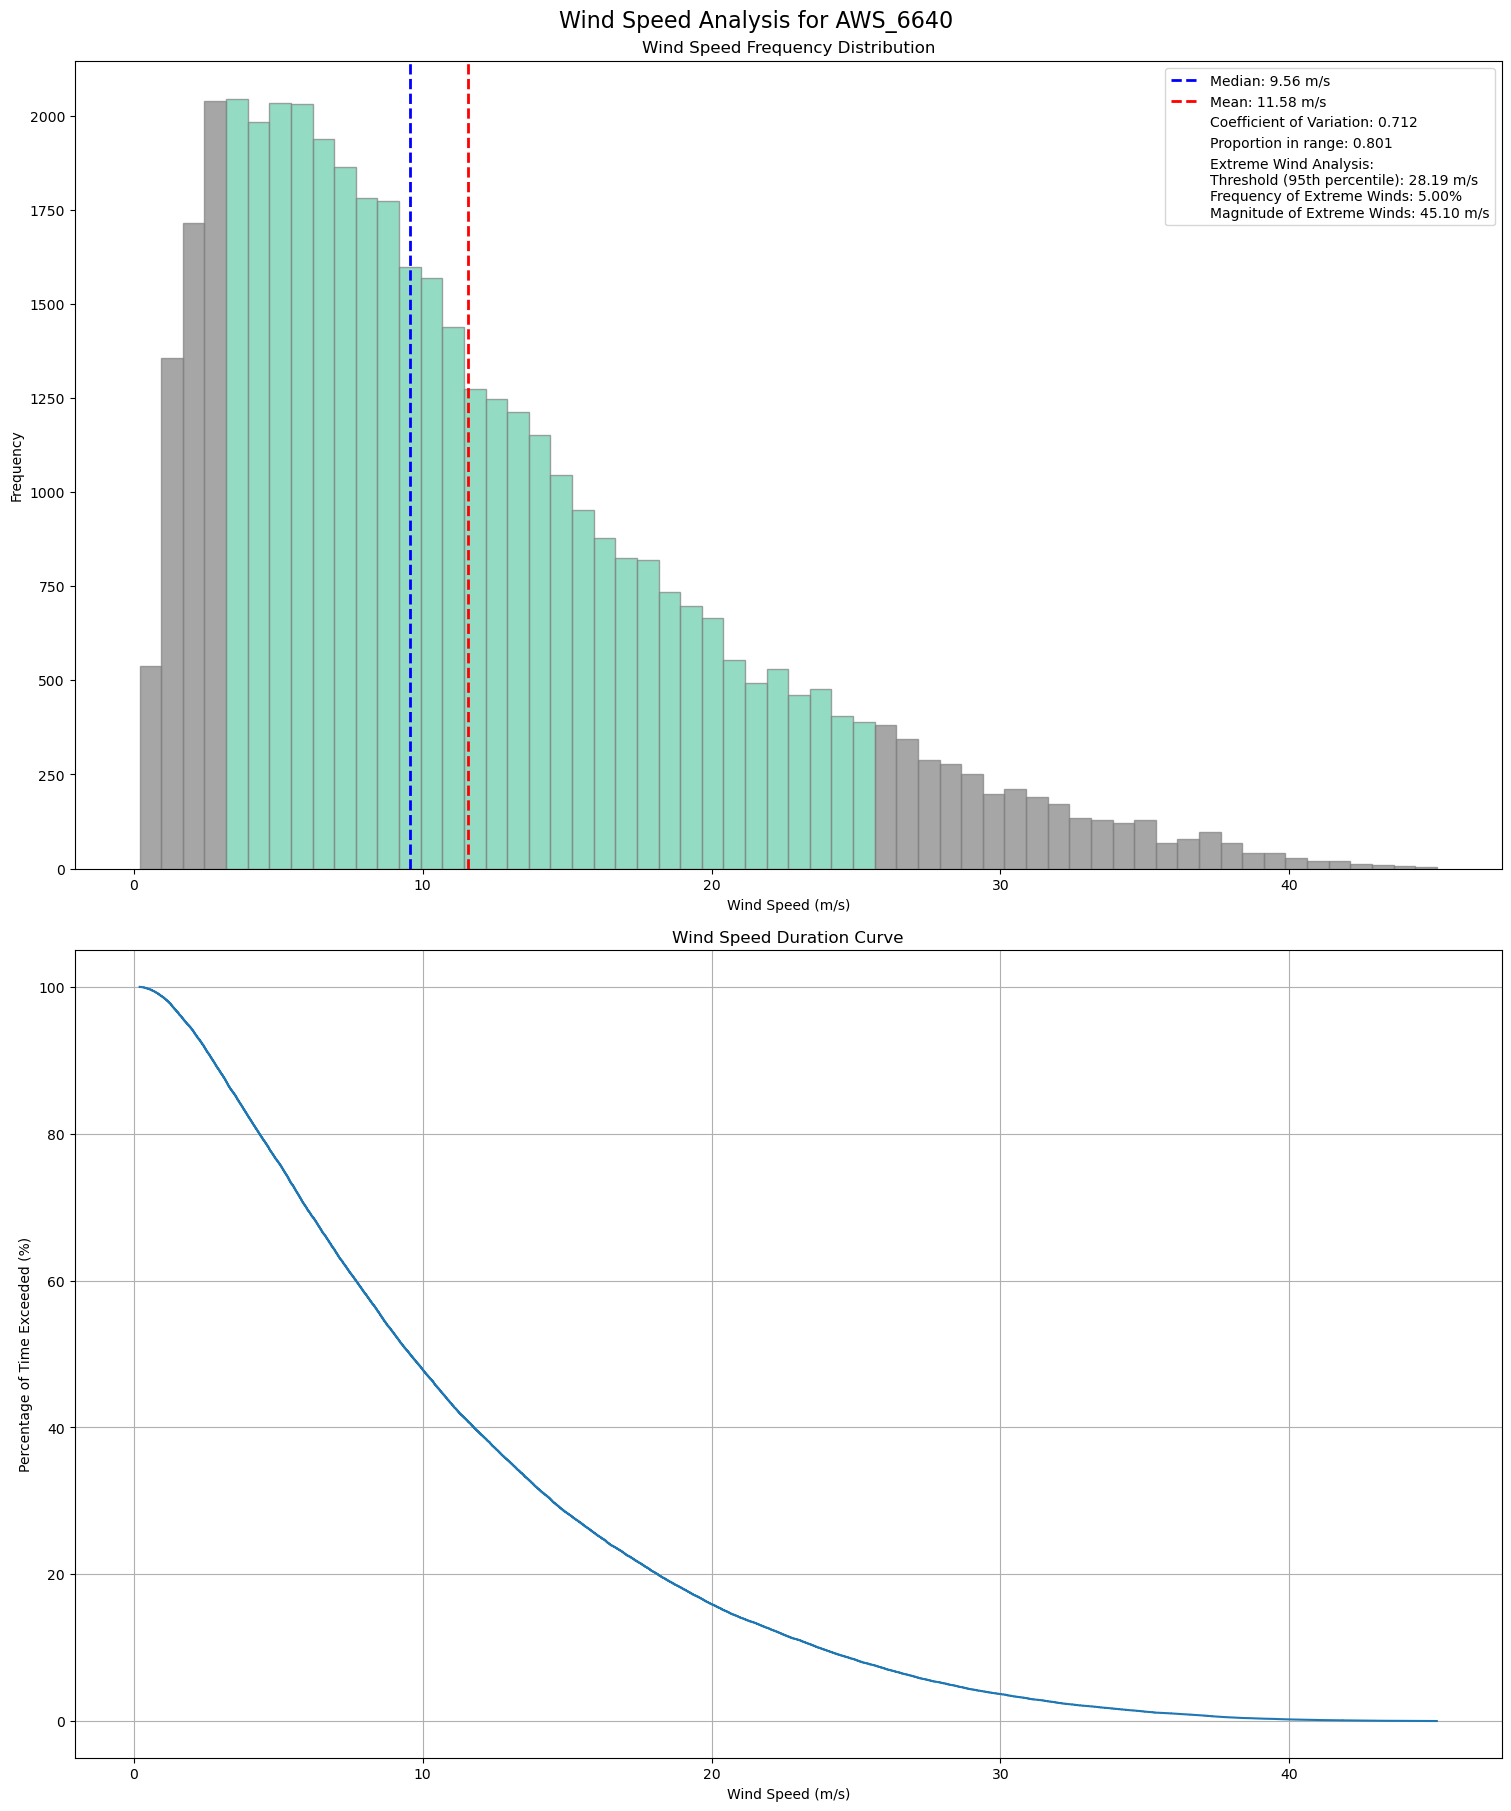

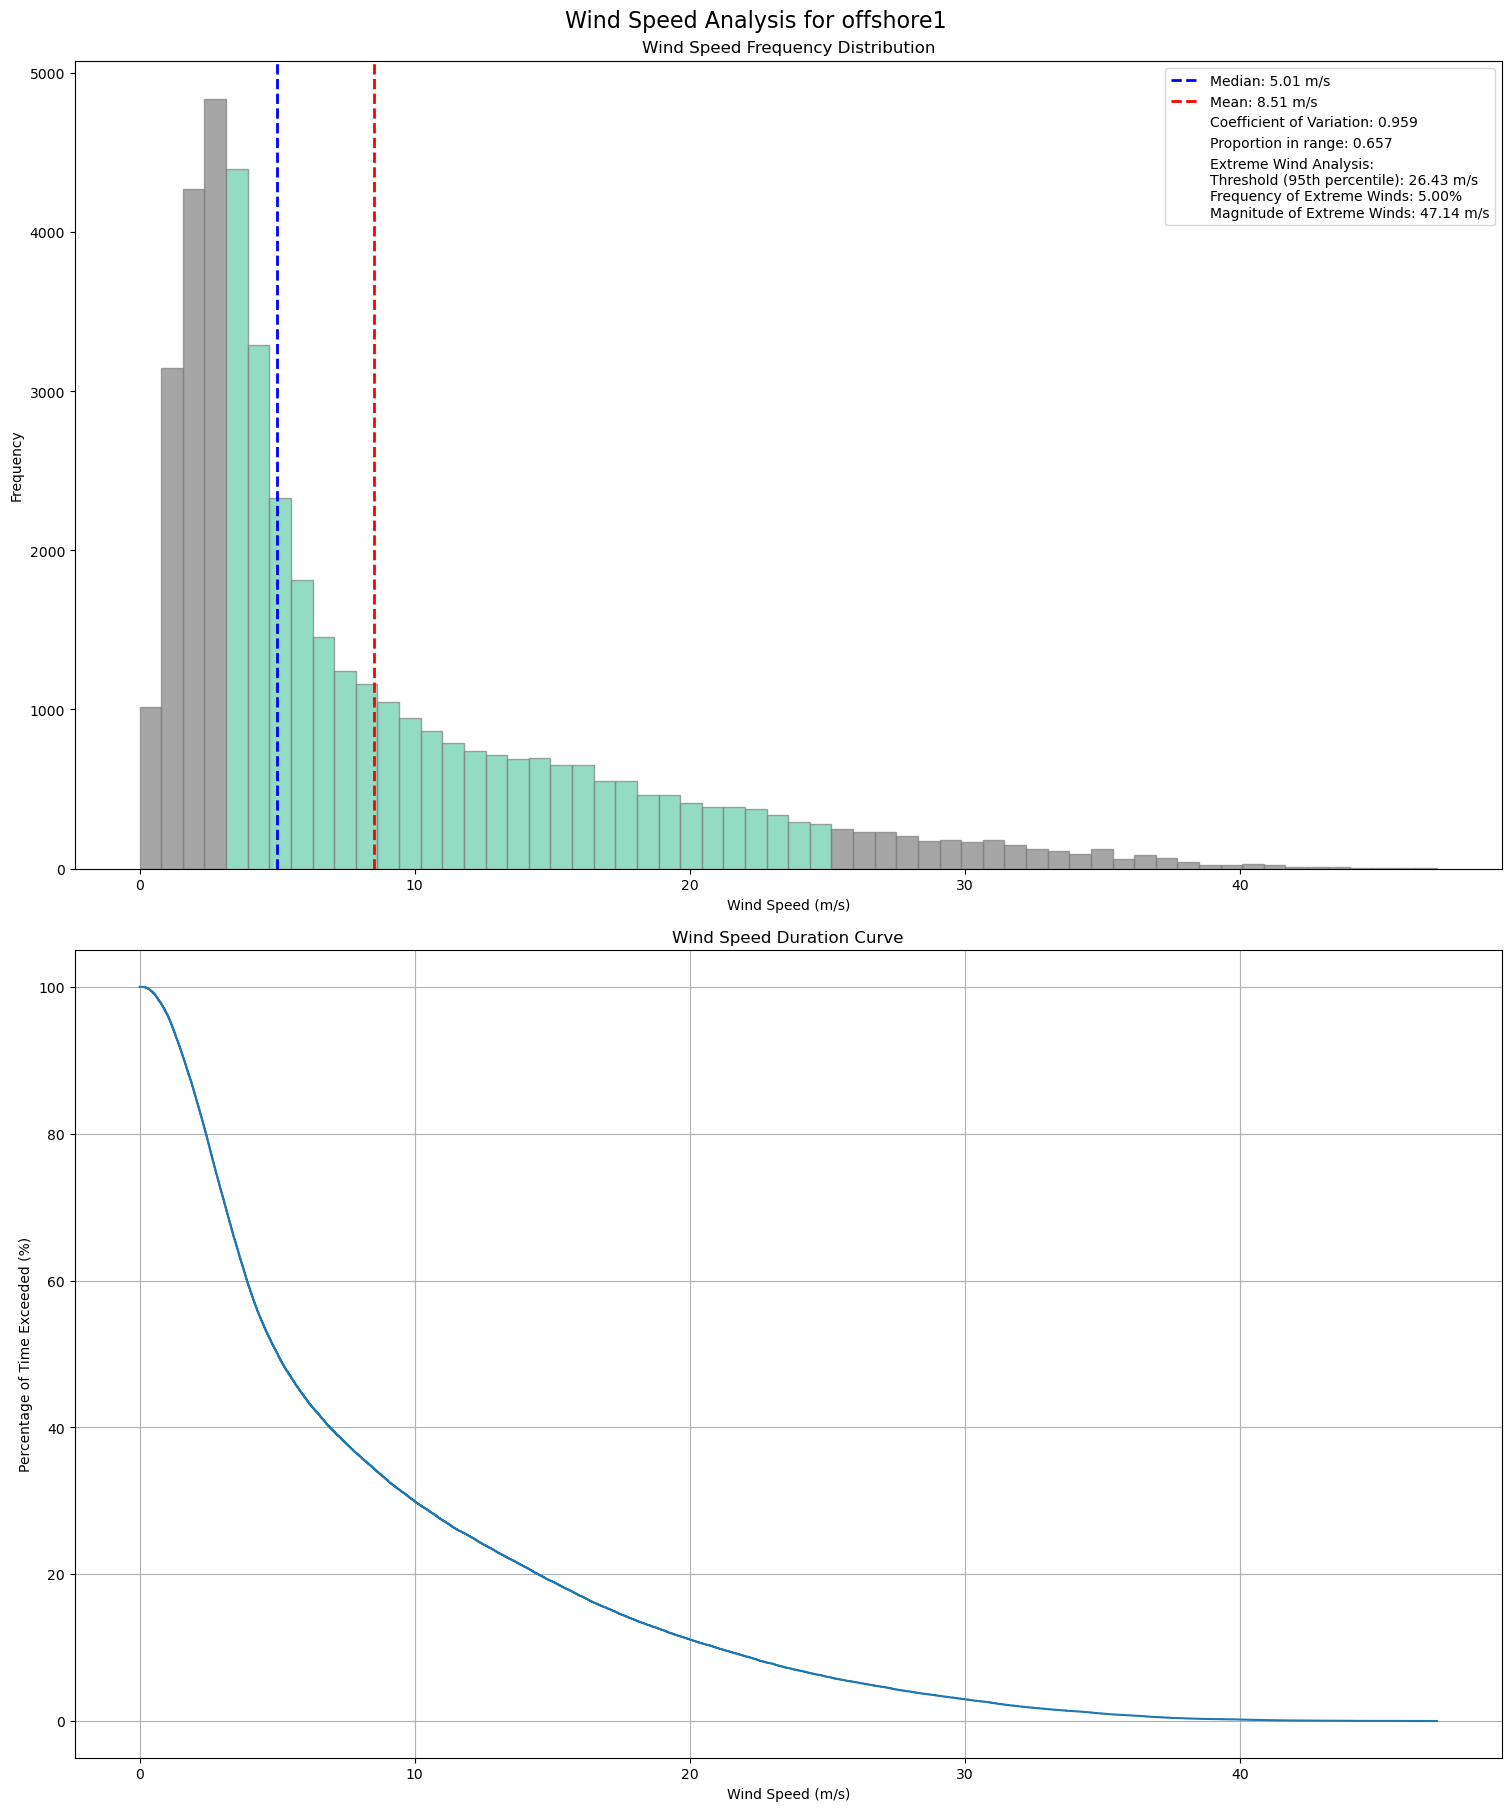

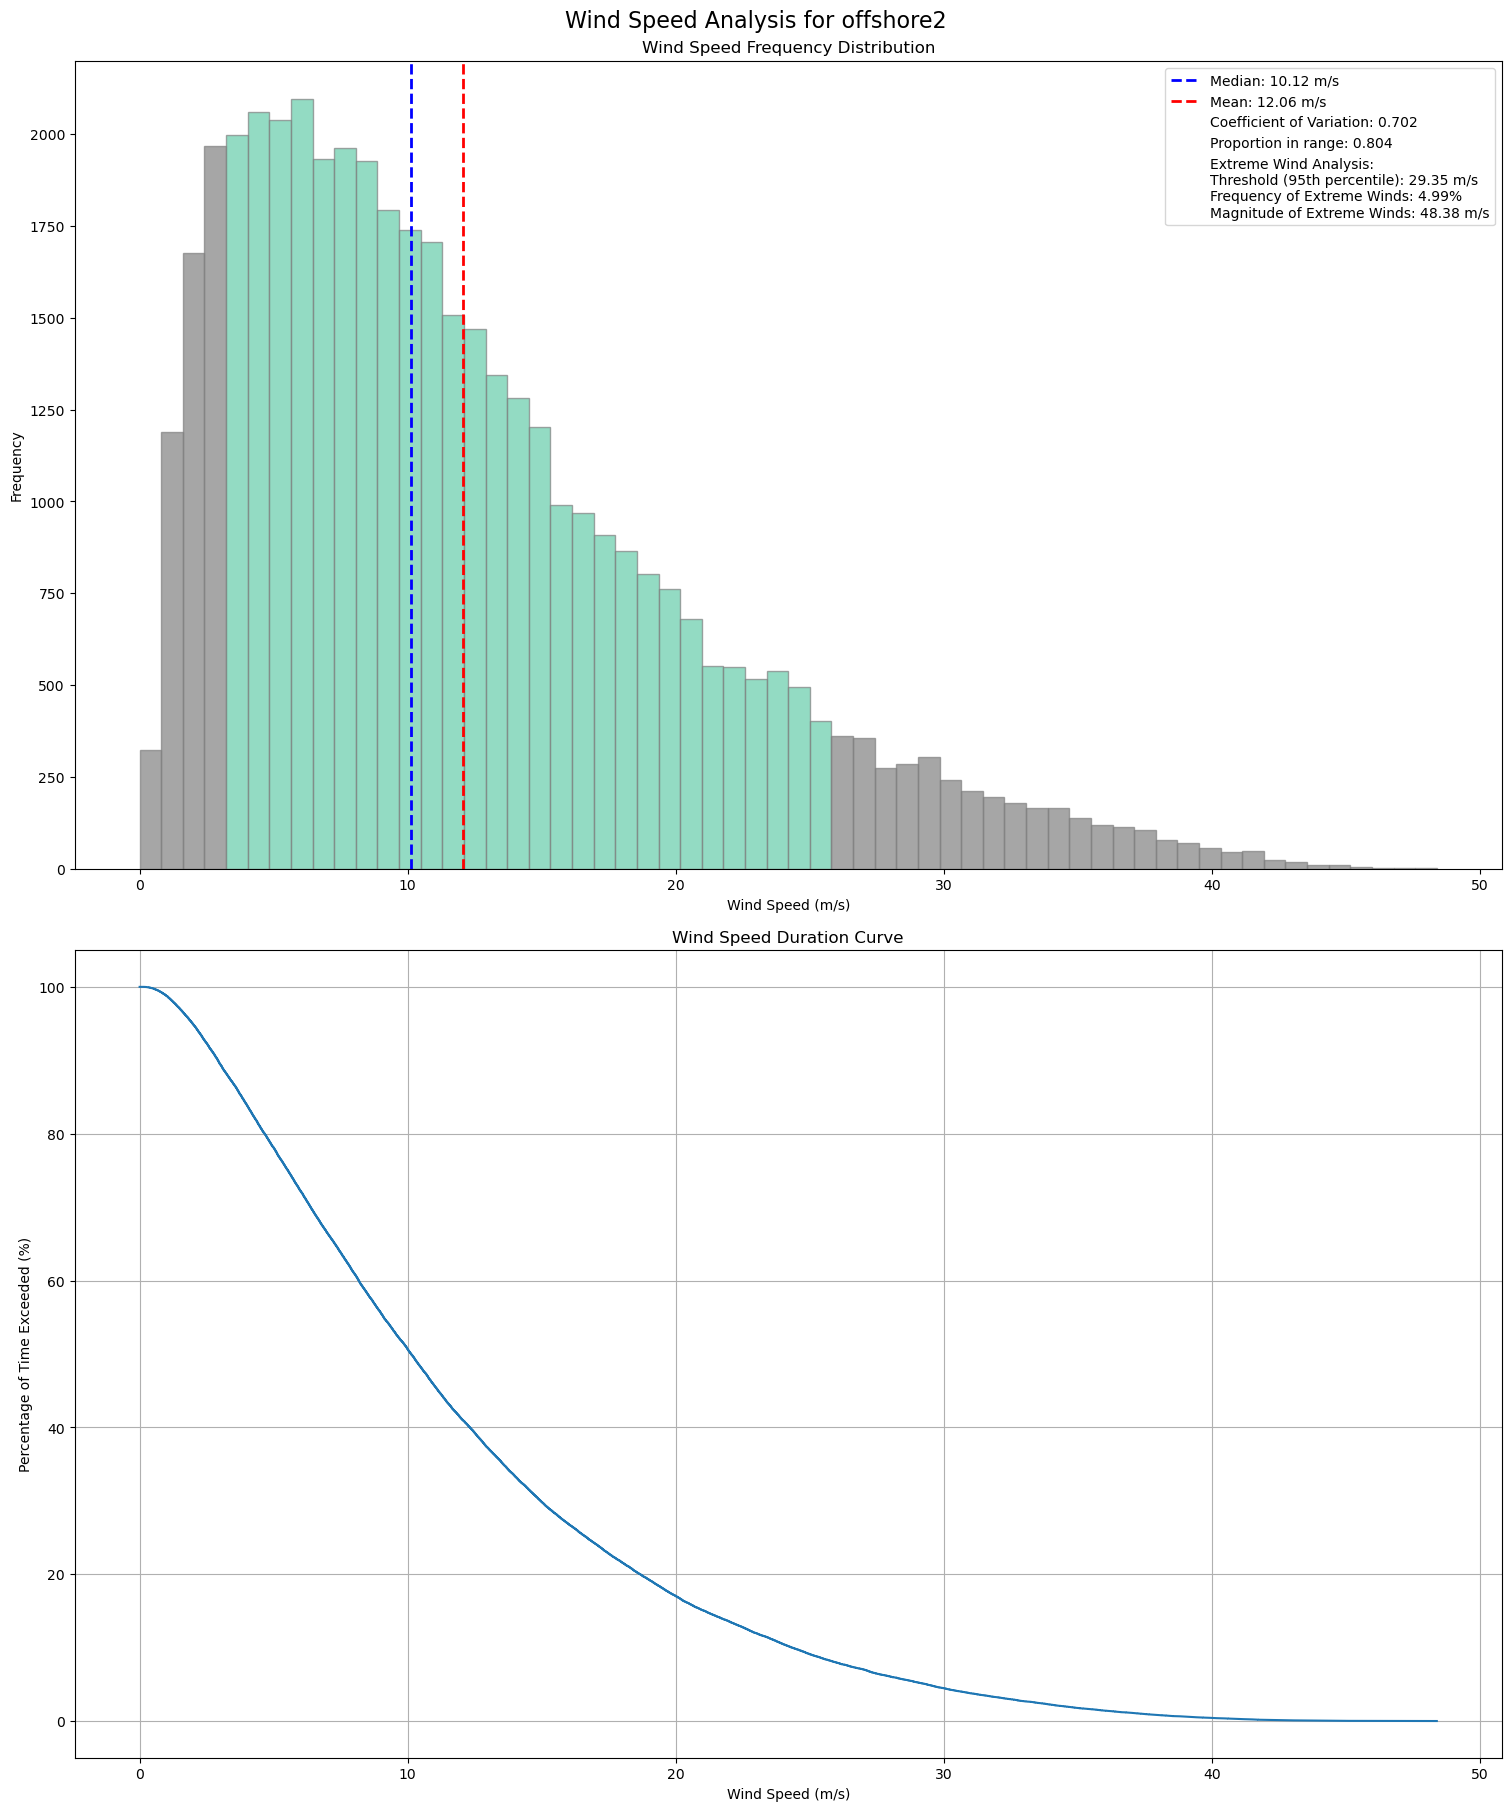

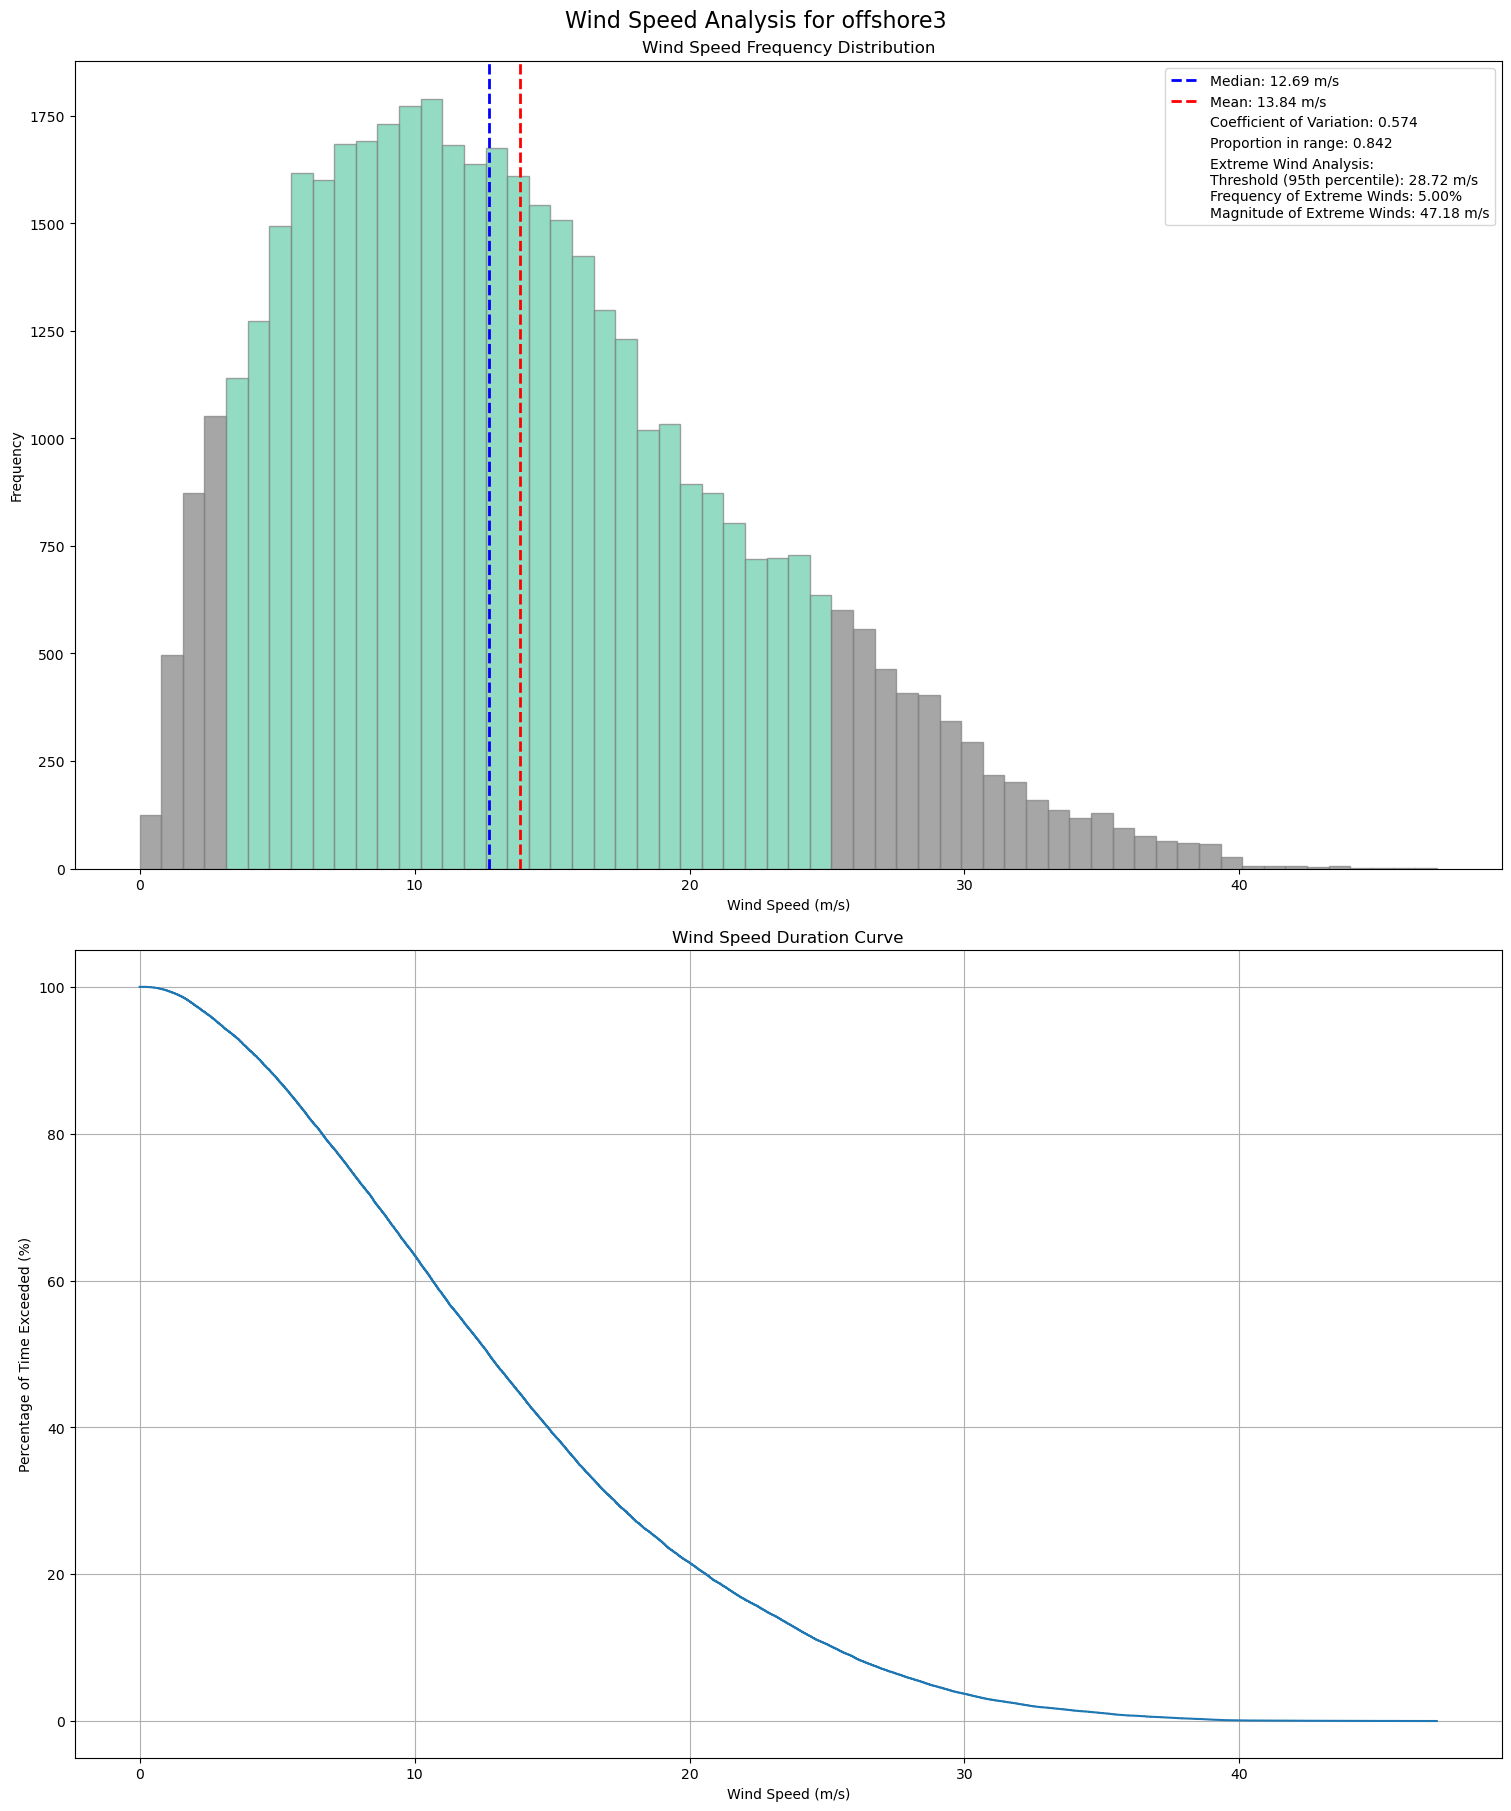

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the directory where the CSV files are stored
input_dir = r'C:\Users\gille\OneDrive\Documents\Travail\HEC-University\Master_2\Master Thesis\Code\wind_data\MAR_24\csv\load_factor'

# Function to calculate the Coefficient of Variation
def calculate_cv(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return std_dev / mean if mean else 0

# Function to plot the Wind Speed Frequency Distribution
def plot_windspeed_distribution(data, ax, color_thresholds=(3, 25)):
    median_windspeed = np.median(data)
    mean_windspeed = np.mean(data)
    cv = calculate_cv(data)
    hours_in_range = ((data >= color_thresholds[0]) & (data <= color_thresholds[1])).sum()
    proportion_in_range = hours_in_range / len(data)
    extreme_threshold = np.percentile(data, 95)  # 95th percentile as the threshold
    extreme_wind_speeds = data[data > extreme_threshold]
    frequency_of_extreme_winds = len(extreme_wind_speeds) / len(data)
    magnitude_of_extreme_winds = np.max(extreme_wind_speeds)

    # Plot the histogram
    counts, bins, patches = ax.hist(data, bins=60, color='mediumaquamarine', alpha=0.7, edgecolor='grey')

    # Color the bars outside the color_thresholds range in grey
    for bin, patch in zip(bins, patches):
        if bin < color_thresholds[0] or bin > color_thresholds[1]:
            patch.set_color('grey')

    # Add lines for median and mean
    ax.axvline(median_windspeed, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_windspeed:.2f} m/s')
    ax.axvline(mean_windspeed, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_windspeed:.2f} m/s')

    # Prepare custom legend entries
    cv_patch = mpatches.Patch(color='none', label=f'Coefficient of Variation: {cv:.3f}', alpha=0)
    prop_patch = mpatches.Patch(color='none', label=f'Proportion in range: {proportion_in_range:.3f}', alpha=0)
    extreme_wind_patch = mpatches.Patch(color='none', label=f'Extreme Wind Analysis:\nThreshold (95th percentile): {extreme_threshold:.2f} m/s\nFrequency of Extreme Winds: {frequency_of_extreme_winds:.2%}\nMagnitude of Extreme Winds: {magnitude_of_extreme_winds:.2f} m/s', alpha=0)

    # Add all legend entries
    handles, labels = ax.get_legend_handles_labels()
    handles.extend([cv_patch, prop_patch, extreme_wind_patch])
    ax.legend(handles=handles, loc='upper right')

    ax.set_title('Wind Speed Frequency Distribution')
    ax.set_xlabel('Wind Speed (m/s)')
    ax.set_ylabel('Frequency')

# Function to plot the Wind Speed Duration Curve
def plot_duration_curve(data, ax):
    sorted_data = np.sort(data)[::-1]
    ax.plot(sorted_data, np.linspace(0, 100, sorted_data.size))
    ax.set_title('Wind Speed Duration Curve')
    ax.set_xlabel('Wind Speed (m/s)')
    ax.set_ylabel('Percentage of Time Exceeded (%)')
    ax.grid(True)

# Loop over each CSV file and create the combined plot layout
for csv_file in os.listdir(input_dir):
    if csv_file.endswith('_lf.csv'):
        df = pd.read_csv(os.path.join(input_dir, csv_file))
        wind_speed_data = df['100m'].dropna().values  # Remove any NaN values
        location_name = csv_file.replace('_lf.csv', '')

        # Set up the figure and subplots
        fig, axs = plt.subplots(2, 1, figsize=(15, 18), constrained_layout=True)
        fig.suptitle(f'Wind Speed Analysis for {location_name}', fontsize=16)

        # Plot frequency distribution with the additional information included in the legend
        plot_windspeed_distribution(wind_speed_data, axs[0])

        # Plot the Duration Curve
        plot_duration_curve(wind_speed_data, axs[1])

        # Show the plot
        plt.show()


Distance from AWS_0460 to Narsaq: 100.39 km
Distance from AWS_0680_1 to Narsaq: 136.28 km
Distance from AWS_0680_2 to Narsaq: 88.90 km
Distance from AWS_6640 to Narsaq: 114.40 km
Distance from offshore1 to Narsaq: 70.66 km
Distance from offshore2 to Narsaq: 129.56 km
Distance from offshore3 to Narsaq: 182.71 km


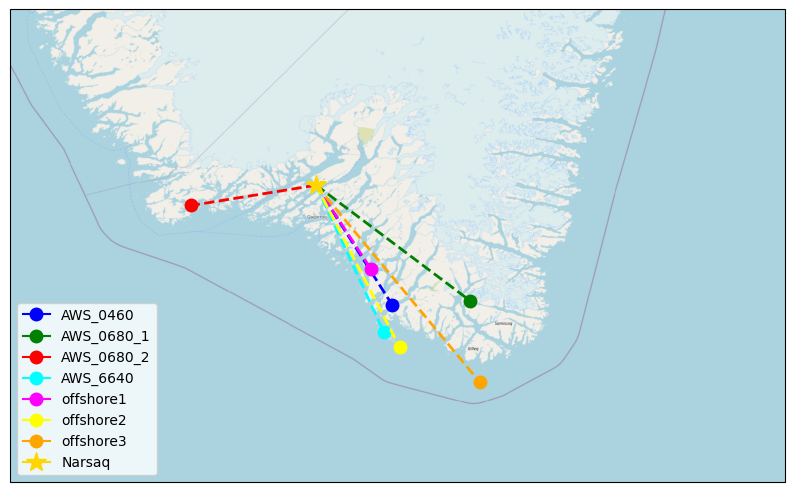

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
from geopy.distance import geodesic
import os

# Define the directory where the CSV files are stored
input_dir = r'C:\Users\gille\OneDrive\Documents\Travail\HEC-University\Master_2\Master Thesis\Code\wind_data\MAR_24\csv'

# Narsaq coordinates
narsaq_coords = (60.9167, -46.0500)  # (latitude, longitude)

# Initialize an empty DataFrame to hold wind locations from all files
wind_locations = pd.DataFrame(columns=['NAME', 'stLAT', 'stLON'])

# Loop through each file and collect wind location data
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_dir, filename)
        df = pd.read_csv(file_path)
        # Convert 'stLAT' and 'stLON' to float to avoid any formatting issues
        df['stLAT'] = pd.to_numeric(df['stLAT'], errors='coerce')
        df['stLON'] = pd.to_numeric(df['stLON'], errors='coerce')
        # Selecting the relevant columns based on the provided format
        wind_locations = pd.concat([wind_locations, df[['NAME', 'stLAT', 'stLON']]], ignore_index=True)

# Remove duplicates if any file overlaps in wind plant data
wind_locations.drop_duplicates(inplace=True)

# Initialize a map with the OpenStreetMap tiles
osm_tiles = OSM()
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(1, 1, 1, projection=osm_tiles.crs)
ax.set_extent([-50, -40, 59, 62], crs=ccrs.PlateCarree())  # You might need to adjust this for a better fit
ax.add_image(osm_tiles, 8)  # A higher zoom level for more detail

# Use a different color for each wind location
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange']
color_index = 0
# Plot each wind location with a line to Narsaq and compute the distance
for index, row in wind_locations.iterrows():
    # Ensure that latitude and longitude are floats
    # Skip rows where latitude or longitude are NaN
    if pd.isna(row['stLAT']) or pd.isna(row['stLON']):
        continue
    try:
        lat, lon = float(row['stLAT']), float(row['stLON'])
        color = colors[color_index % len(colors)]  # Cycle through colors
        ax.plot(lon, lat, marker='o', color=color, markersize=9, transform=ccrs.PlateCarree(), label=row['NAME'])
        ax.plot([narsaq_coords[1], lon], [narsaq_coords[0], lat], color=color, linestyle='--', linewidth=2, transform=ccrs.PlateCarree())

        # Compute and print the distance to Narsaq
        distance = geodesic(narsaq_coords, (lat, lon)).kilometers
        print(f"Distance from {row['NAME']} to Narsaq: {distance:.2f} km")
        
        # Increment color index only for valid plots
        color_index += 1
    except ValueError as e:
        print(f"Error plotting {row['NAME']}: {e}")

# Plot Narsaq with a distinct marker
ax.plot(narsaq_coords[1], narsaq_coords[0], marker='*', color='gold', markersize=15, transform=ccrs.PlateCarree(), label='Narsaq')

# Add a legend to the map
plt.legend(loc='lower left')

# Show the map
plt.show()